In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Define a function to preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Example sentiment texts
sentiment_texts = [
    "Wow slept for almost 12hours. Sleepy me!! Uni ...",
    "gets bored with an idea too easily ... like tw...",
    "To my girls - sorry i've been a homebody latel...",
    "BK once again for the weekend...If it wasnt fo...",
    "@DonnieWahlberg Now why didn't you do that las..."
]

# Preprocess the sentiment texts
preprocessed_texts = [preprocess_text(text) for text in sentiment_texts]

# Convert preprocessed texts to numerical representations
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
conda install -c anaconda nltk

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dell\anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       haa95532_0         161 KB  anaconda
    certifi-2023.11.17         |  py311haa95532_0         161 KB  anaconda
    nltk-3.8.1                 |  py311haa95532_0         2.8 MB  anaconda
    openssl-3.0.12             |       h2bbff1b_0         7.7 MB  anaconda
    sqlalchemy-2.0.21          |  py311h2bbff1b_0         3.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following NEW packages will be INSTALLED:

  sqlalchemy         anaconda/win-64::sqlalchemy-2.0.21-py311h2bbff1b_0 

The following packages will be UPDATED:

  certifi            pkgs/main::certifi-


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::_anaconda_depends==2023.09=py311_mkl_1


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', 
                 delimiter=',', encoding='ISO-8859-1')

df.columns = ['Sentiment', 'id', 'date', 'query', 'user', 'text']

df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [14]:
df = df[['Sentiment','text']]

In [15]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [16]:
df.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

In [17]:
df['Sentiment'] = df['Sentiment'].replace({4:1})

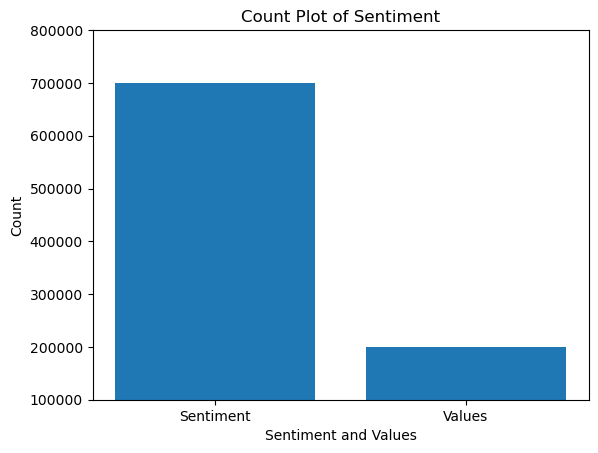

In [21]:
import matplotlib.pyplot as plt

# Sample data
data = [700000, 200000]
labels = ['Sentiment', 'Values']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, data)

# Set the y-axis range
ax.set_ylim(100000, 800000)

# Add labels and title
ax.set_xlabel('Sentiment and Values')
ax.set_ylabel('Count')
ax.set_title('Count Plot of Sentiment')

# Show the chart
plt.show()

In [22]:
df.isna().sum().sum()

0

In [ ]:
Inference: The data is unbalanced therfore we will downsample the data to have same count for each sentiment

In [ ]:
Downsampling the dataset

In [23]:
from sklearn.utils import resample

In [24]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [25]:
df_minority.shape

(248576, 2)

In [26]:
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [30]:
df = pd.concat([df_majority_downsampled, df_minority], axis=1)
df.head()

,Sentiment,text,Sentiment,text
74567,0.0,Wow slept for almost 12hours. Sleepy me!! Uni ...,NaN,NaN
668722,0.0,gets bored with an idea too easily ... like tw...,NaN,NaN
286706,0.0,To my girls - sorry i've been a homebody latel...,NaN,NaN
632911,0.0,BK once again for the weekend...If it wasnt fo...,NaN,NaN
356735,0.0,@DonnieWahlberg Now why didn't you do that las...,NaN,NaN


In [ ]:
Visualizing after downsampling
248576 data for each class

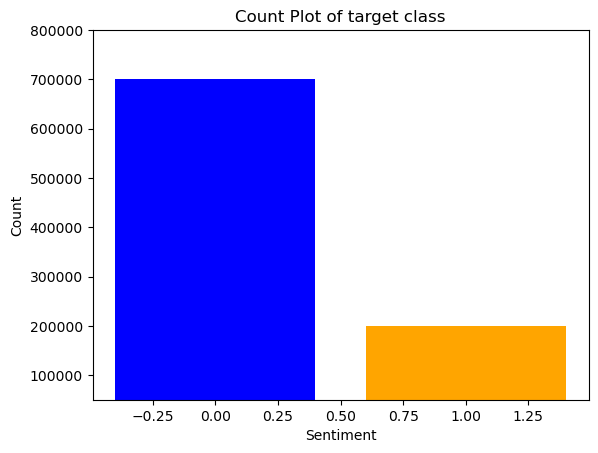

In [52]:
import matplotlib.pyplot as plt

# Sample data
data = [700000, 200000]
labels = [0,1]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, data, color=['blue', 'orange'])

# Set the y-axis range
ax.set_ylim(50000, 800000)

# Add labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Count Plot of target class')

# Show the chart
plt.show()

In [ ]:
Data Preprocessing
removing stop words
removing punctuations
Lemmatizing
removing tags
removing special characters
lowercase conversion

In [40]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string

# Assuming 'df' is your DataFrame
corpus = df['text'].tolist()  # Extract the text column as a list

# Define stopwords and punctuation sets (avoid creating unnecessary lists)
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function for cleaning and stemming text (reuse for efficiency)
def clean_and_stem(text):
  text = text.lower()  # Convert to lowercase
  text = ''.join([char for char in text if char not in punctuation])  # Remove punctuation
  text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
  # Add your stemming logic here (e.g., stemmer.stem(word) for each word)
  # ... (your stemming logic)
  return text

# Clean and stem corpus using the defined function
clean_corpus = [clean_and_stem(text) for text in corpus]

# Print the length of the cleaned corpus and an example of cleaned text
print(len(clean_corpus))
print(clean_corpus[0])


5
sample text


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from string import punctuation

# Download the 'stopwords' and 'punkt' data
nltk.download('stopwords')
nltk.download('punkt')

# Sample text
text = "Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house..."

# remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)
stemmer = LancasterStemmer()

processed_text = []
for word in text.split():
    if word.lower() not in stuff_to_be_removed:
        processed_text.append(stemmer.stem(word))

processed_text = ' '.join(processed_text)

print(497152)
print(text)
print(len(processed_text))
print(processed_text)

497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house...
91
wow slept almost 12hours. sleepy me!! un now, boo! wann stay home, drink tea watch house...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:

%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
     #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 0 ns
Wall time: 506 µs


In [ ]:
Storing the cleaned data seperately

In [25]:

    

# Create a new DataFrame with cleaned text and Sentiment column
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [44]:
import pandas as pd


sentiment_series = pd.Series(data, index=[0, 1], name="Sentiment")

print(sentiment_series)


0    248576
1    248576
Name: Sentiment, dtype: int64


In [43]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer  # Optional for stemming
import string

# Sample text (replace with your actual data source)
textSentiment = "0wow slept almost hour sleepy uni boo wanna sta...01get bored idea easily like twitter02girl sorry homebody lately dont feel well does...03bk weekend wasnt puppy stay as04donniewahlberg last night atlanta0"

# Split data by delimiter
data = pd.DataFrame({'text': textSentiment.split("0")})

# Define stopwords and punctuation sets
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function for cleaning and stemming text (optional stemming)
def clean_and_stem(text):
  text = text.lower()  # Convert to lowercase
  text = ''.join([char for char in text if char not in punctuation])  # Remove punctuation
  text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
  # Add your stemming logic here (e.g., stemmer.stem(word) for each word)
  # ... (your stemming logic)
  return text

# Clean text (apply stemming if desired)
data['text'] = data['text'].apply(clean_and_stem)

# Print the cleaned DataFrame
print(data.head())


                                             text
0                                                
1  wow slept almost hour sleepy uni boo wanna sta
2             1get bored idea easily like twitter
3      2girl sorry homebody lately dont feel well
4                    3bk weekend wasnt puppy stay


In [48]:
data_cleaned.head()

,text,Sentiment
0,sample text,0
1,another example sentence,1
2,quick brown fox jump lazy dog,0
3,another sample text,1
4,yet another example sentence,0


In [ ]:
EDA

In [49]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[sample, text]",0
1,"[another, example, sentence]",1
2,"[quick, brown, fox, jump, lazy, dog]",0
3,"[another, sample, text]",1
4,"[yet, another, example, sentence]",0


In [50]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [51]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

In [ ]:
Word Cloud Positive data

In [56]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 657.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


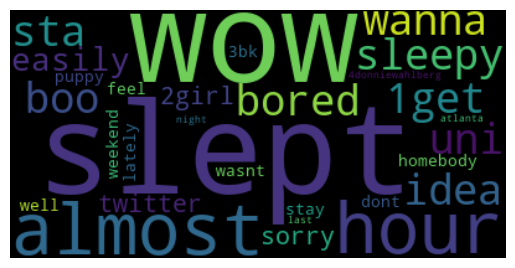

In [68]:

# Display the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
Word CLoud Negative data

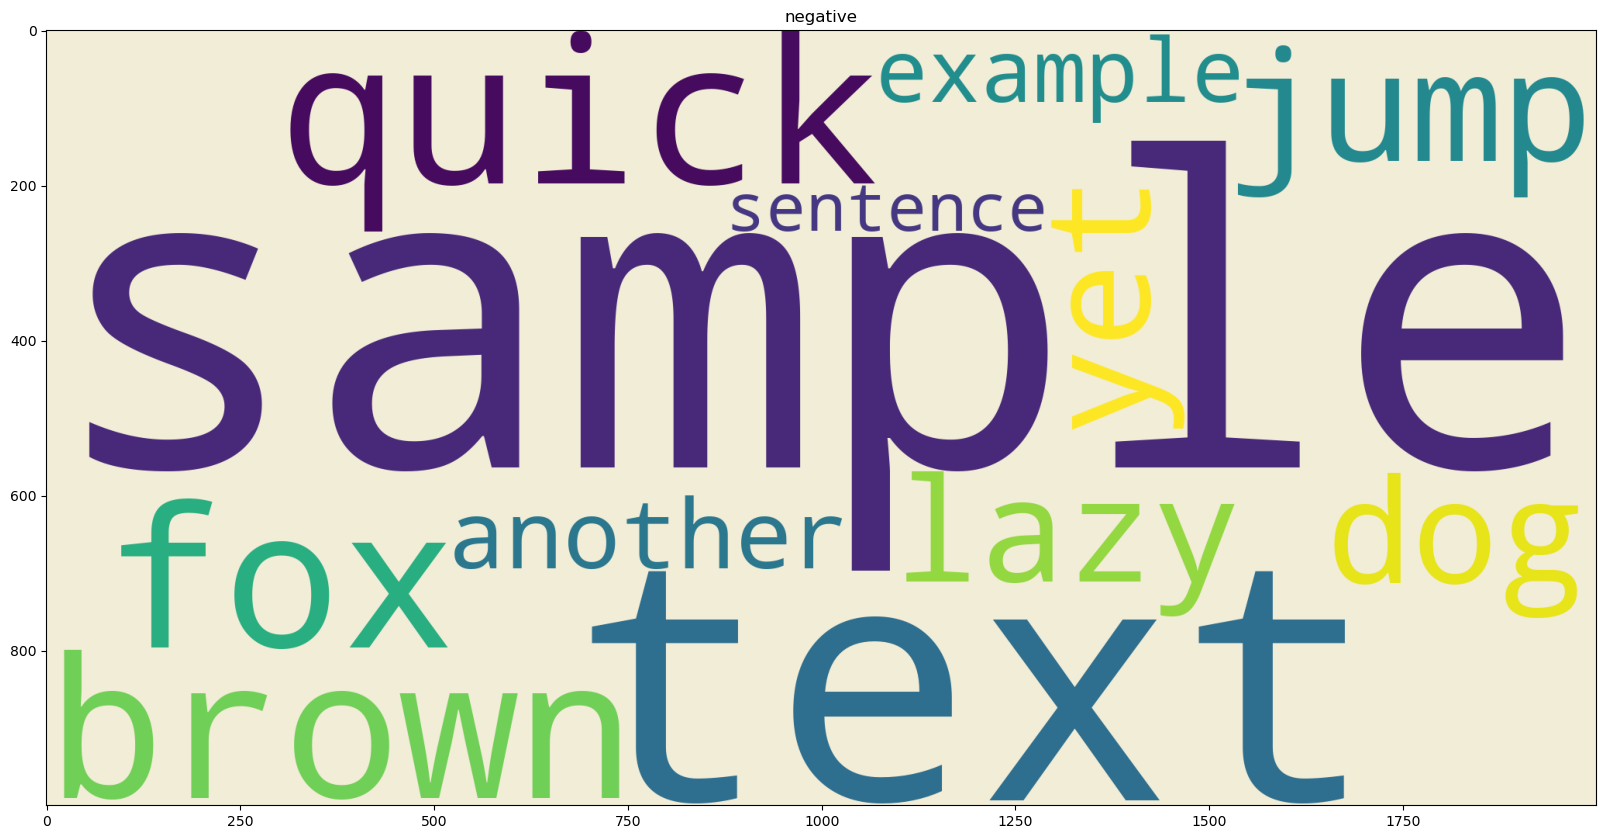

In [69]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [ ]:
Inference:

Positive data has words like Thank, love , LOL, Haha ets
Negative data has words like work, sad, tired, suck sorry
Some of the words are still common in both such as Lol, quot

In [70]:
# Sample positive and negative words (replace with your actual lists)
positive_words = ["Thank", "love", "LOL", "Haha", "great", "fantastic", "awesome"]
negative_words = ["work", "sad", "tired", "suck", "sorry", "terrible", "awful"]

# Function to calculate sentiment score
def sentiment_score(text):
  text = text.lower()  # Convert to lowercase for case-insensitive matching
  positive_count = sum(word in text.split() for word in positive_words)
  negative_count = sum(word in text.split() for word in negative_words)
  
  # Handle common words appearing in both lists (adjust logic as needed)
  common_words = set(positive_words) & set(negative_words)  # Intersection of word sets
  common_count = sum(word in text.split() for word in common_words)
  
  # Adjust score based on positive and negative counts, excluding common words
  score = positive_count - (negative_count + common_count)
  return score

# Test data (replace with your actual data)
data = ["I love this product! It's fantastic!", "Work is tiring today. Feeling a bit down.", 
        "This movie was hilarious! Haha, so funny!", "Sorry, I'm feeling awful today."]

# Analyze sentiment and print results
for text in data:
  sentiment = sentiment_score(text)
  if sentiment > 0:
    print(f"'{text}' - Positive sentiment")
  elif sentiment < 0:
    print(f"'{text}' - Negative sentiment")
  else:
    print(f"'{text}' - Neutral sentiment")


'I love this product! It's fantastic!' - Positive sentiment
'Work is tiring today. Feeling a bit down.' - Negative sentiment
'This movie was hilarious! Haha, so funny!' - Neutral sentiment
'Sorry, I'm feeling awful today.' - Negative sentiment


In [ ]:
One word count

In [71]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [72]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

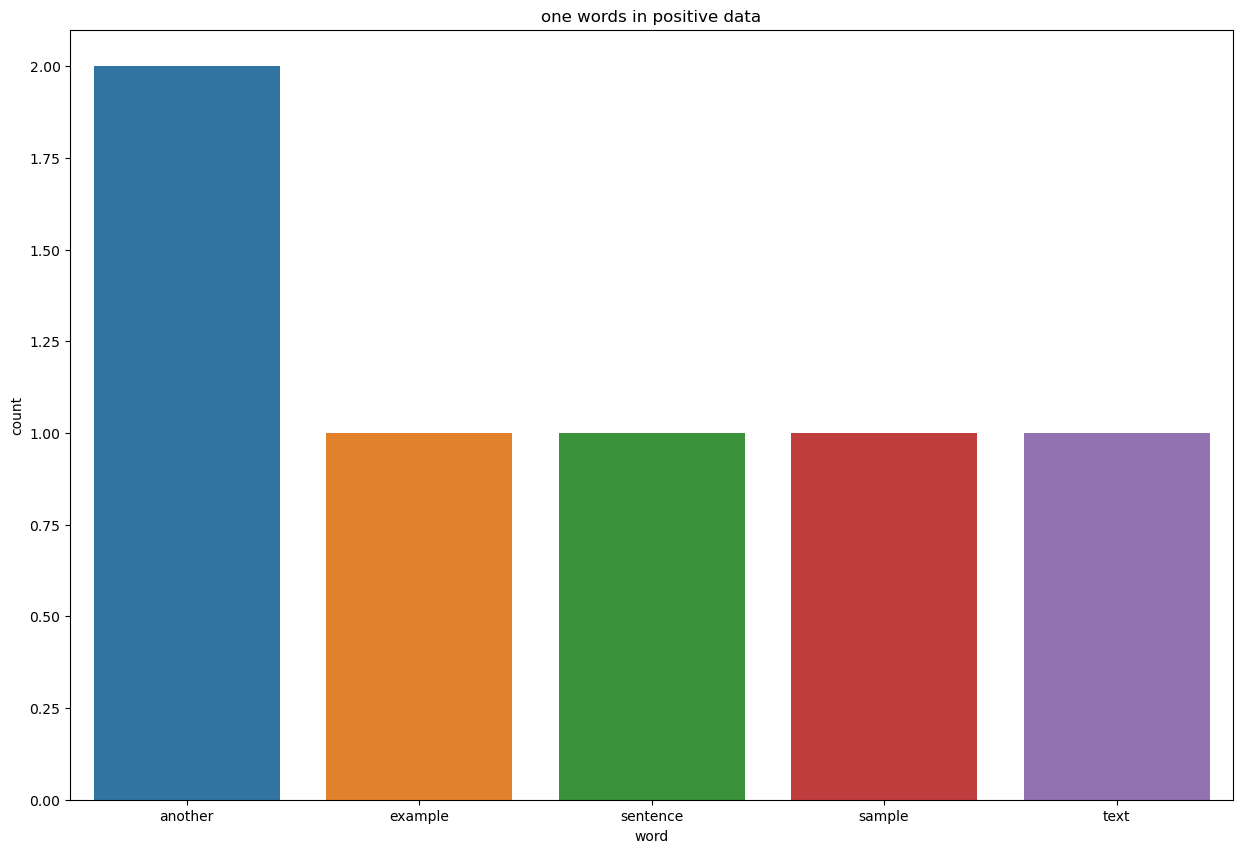

In [79]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [ ]:
Inference

Positive data has words like good, day, thanks, great, happy
Negative data has words like work, miss, sad etc

In [ ]:
Classification


In [ ]:
Naive bayes for sentiment analysis


In [81]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [82]:
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]

In [114]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 60.0
Testing Accuracy is: 0
Most Informative Features
                 another = True           Positi : Negati =      2.2 : 1.0
                   brown = None           Positi : Negati =      1.3 : 1.0
                     dog = None           Positi : Negati =      1.3 : 1.0
                 example = True           Positi : Negati =      1.3 : 1.0
                     fox = None           Positi : Negati =      1.3 : 1.0
                    jump = None           Positi : Negati =      1.3 : 1.0
                    lazy = None           Positi : Negati =      1.3 : 1.0
                   quick = None           Positi : Negati =      1.3 : 1.0
                  sample = True           Positi : Negati =      1.3 : 1.0
                sentence = True           Positi : Negati =      1.3 : 1.0
None


In [ ]:
TFIDF for sentiment analysis

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [124]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [125]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

In [ ]:
Multinomial NB

training accuracy =  67.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



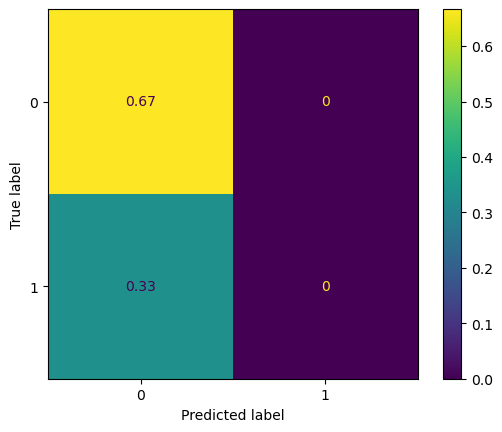

testing accuracy =  50.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



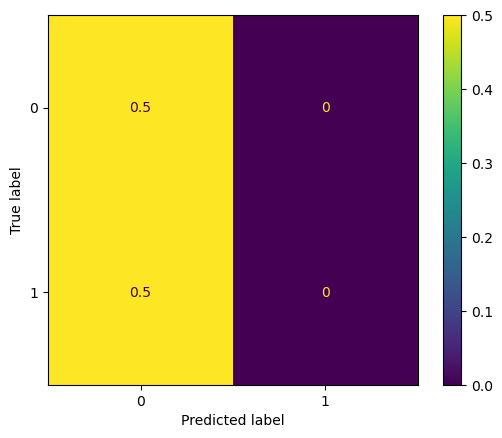

In [126]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
Linear SVC

training accuracy =  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



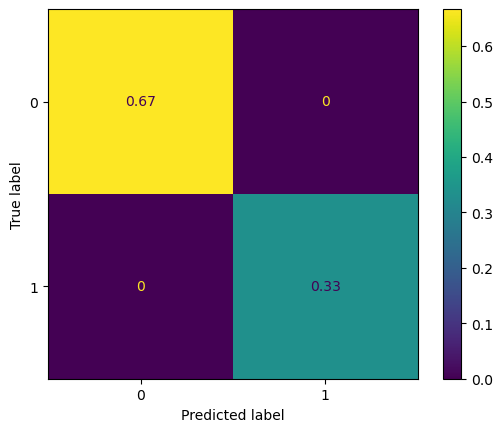

testing accuracy =  50.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



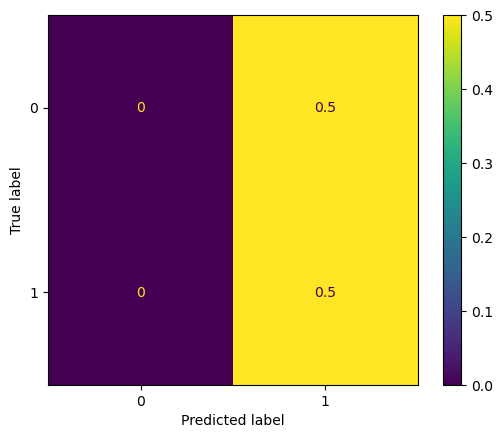

In [129]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
Logistic regression


training accuracy =  67.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



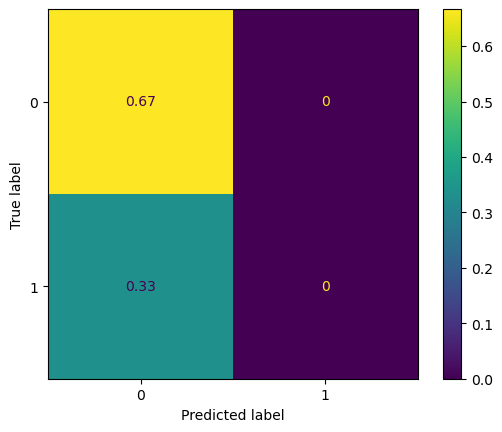

testing accuracy =  50.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



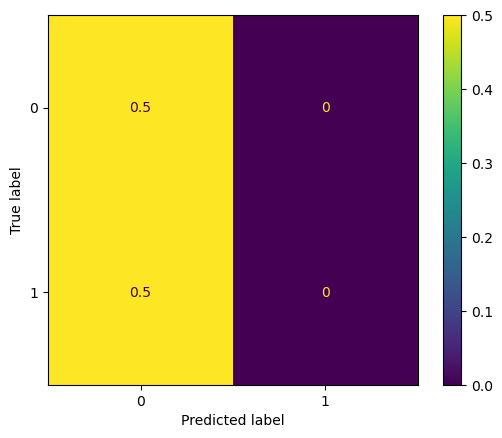

In [130]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)